Step 1: Import Libraries and Dataset

In [12]:
# 1. Import required libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np
import torchvision.transforms as transforms
from PIL import Image
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

 Step 2: Load and Preprocess Data

In [11]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize pixel values to [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

 Normalization helps model train faster and better.
One-hot encoding turns class label 3 → [0 0 0 1 0 0 0 0 0 0].

Step 3: Build CNN Model

In [13]:
model = Sequential()

# Conv + Pooling layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten and Dense layers
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))  # Regularization
model.add(Dense(10, activation='softmax'))  # 10 classes

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Step 4: Compile Model

In [14]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

✅ Adam is adaptive and fast.
✅ For multi-class classification, categorical_crossentropy is used.

Step 5: Train the Model

In [15]:
history = model.fit(X_train, y_train, epochs=10, batch_size=64,
                    validation_data=(X_test, y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 59s 74ms/step - accuracy: 0.2707 - loss: 1.9774 - val_accuracy: 0.5211 - val_loss: 1.3759
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 77s 68ms/step - accuracy: 0.4555 - loss: 1.4957 - val_accuracy: 0.5725 - val_loss: 1.2199
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 53s 67ms/step - accuracy: 0.5121 - loss: 1.3628 - val_accuracy: 0.6016 - val_loss: 1.1325
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 85s 72ms/step - accuracy: 0.5444 - loss: 1.2724 - val_accuracy: 0.6341 - val_loss: 1.0606
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 78s 67ms/step - accuracy: 0.5714 - loss: 1.2092 - val_accuracy: 0.6305 - val_loss: 1.0430
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 86s 73ms/step - accuracy: 0.5876 - loss: 1.1614 - val_accuracy: 0.6384 - val_loss: 1.0307
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 70ms/step - accuracy: 0.5984 - loss: 1.1273 - val_accuracy: 0.6605 - val_loss: 0.9748
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 52s 67ms/step - accuracy: 0.6120 - loss: 1.0927 - 

 Step 6: Evaluate Model

In [16]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6803 - loss: 0.9208
Test Accuracy: 0.6827


 Step 7: Visualize Performance

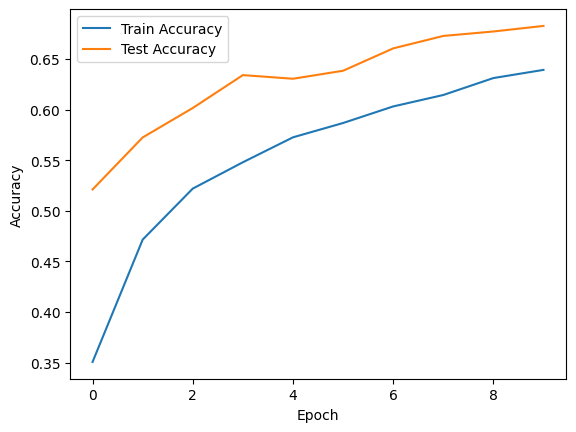

In [17]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Use Pre-trained VGG16 Model

In [18]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D

# Load pretrained VGG16 without the top FC layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze its layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(64, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 654s 835ms/step - accuracy: 0.4194 - loss: 1.6617 - val_accuracy: 0.5483 - val_loss: 1.2956
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 677s 828ms/step - accuracy: 0.5647 - loss: 1.2493 - val_accuracy: 0.5655 - val_loss: 1.2409
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 641s 776ms/step - accuracy: 0.5856 - loss: 1.1941 - val_accuracy: 0.5793 - val_loss: 1.2122
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 622s 775ms/step - accuracy: 0.6011 - loss: 1.1482 - val_accuracy: 0.5763 - val_loss: 1.2003
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 646s 827ms/step - accuracy: 0.6077 - loss: 1.1264 - val_accuracy: 0.5857 - val_loss: 1.1789
